# Section One

In [1]:
# install packages
%pip install matplotlib
%matplotlib inline
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install IPython


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import packages
import matplotlib.pyplot as plt # to generate plots
import csv # to import and read csv files
import numpy as np # for data processing and mathematical equations (i.e. sum, round, ...etc)
import pandas as pd # data wrangling (i.e. pivot, crosstabulation, merge, ...etc) 
import seaborn as sns # to presetnt plots and graphs 
import os # interact with the operating system
from IPython.display import Image # to display images as banners

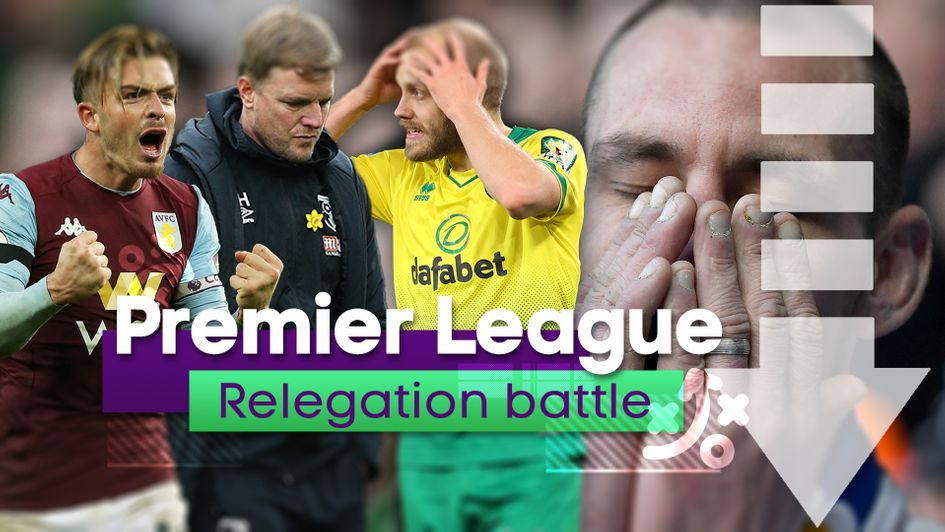

In [3]:
# set the new working directory, I did that to make it easier for the examiner to set the files path only once
os.chdir('C:/Users/Mayada/Desktop/Data Science MSC/DSM020 Data  Programming in Python/Python course work data/course work data/')
os.getcwd() # return absolute path on the system
display(Image('Premier league pic.jpg', unconfined=True))

## Introduction:

* The English Premier League was Formed in February 20, 1992 and is contested by 20 clubs
* The EPL is the world’s most-watched football league with an ever-growing global audience of potentially around 5 billion people
* Also, the English Premier League is now the world’s richest league in terms of money, which comes close to over 3 billion English Pounds Sterling
* Every season, the three lowest placed teams in are relegated to the Championship, while the top two from the Championship get promoted to the Premier League, with an additional team promoted through play-offs
* The plan in this coursework is to work on a Premier League football dataset, and focusing on analyzing the performance of the relegated teams, testing various hypothesis and identifying common patterns

## Objectives:

To identify key patterns in the relegated teams compared to the rest over the last 10 seasons and determine the possible reasons behind relegation

## Examples of events used to determine the extent of the teams' weaknesses:
* Goals scored
* Goals conceded
* Losses scores
* Wins scores
* Full time result
* Yellow and red cards served
* Match referee 

## Hypotheses:

Will look for key patterns and hypotheses in the relegated teams compared to the rest over the last 10 seasons and identify the reasons behind relegation:
1. Bad offensive performance based on (goal Scored) 
2. Bad defensive performance based on (goal Conceded) 
3. First half poor performance of relegated teams
4. Cards have an effect on the (relegated) team's performance
5. Home or away has an impact on relegated clubs
6. Referee has an impact on relegated teams

## Data collection and preprocessing with Pandas:

### Data collection:

* After thorough research, a suitable dataset - based on relevancy to the topic and since the dataset coves 10 full seasons - was identified and acquired from the following github repository <a href="https://github.com/tara-nguyen/english-premier-league-datasets-for-10-seasons/">Link here</a>
* The acquired data covers 10 premier league seasons from season 2010/11 to season 2019/20. It consists of 11 csv files covering two main aspects:
    * Match statistics, containing the head-to-head match statistics across all ten seasons
    * 10 season-end league tables 
* As indicated in the repo, data is free to use from a github user:TARA NGUYEN

### Data Pre-processing:

* Mainly in this section Pandas library was utilized in order to manipulated and perform any pre-processing for data
* leaguetable.csv:
    * 10 csv files (one for each season) were imported into jupyter notebook using pandas library
    * Then the files were merged into a single dataframe (leaguetable), to make it easy to perfrom any analysis on the dataset (in isolation) and to as well join with the match statistics dataset (based on common attributes)
    * Two additional columns were added, the first consists of the associated season year, while the other column contains the binary label of three relegated clubs in each season, based on the club’s position
* epl-allseasons-matchstats.csv:
    * on the match dataframe, a FullTimeWinner variable was derived by having the team winner name instead of it is home or away club, and keeping the draw as it is
    * the relegated attribute was also added in match dataset by performing join with leaguetable dataset based on (Season, FullTimeWinner) and  (Year, Club) respectively, in order to know in each match if the winner was a relegated team or not 
    * One weakness is that when the match ends in a draw, the “relegated” attribute will return draw rather than a team name
    * To get around this, the dataframe was sliced into two, one including all matches where the result is a draw (match_draw) and the other one (match_not_draw) includes all matches where there was a win 
    * After the join, the two where combined together again in allmatch


# Section Two

In [4]:
# os.chdir('C:/Users/Mayada/Desktop/Data Science MSC/DSM020 Data  Programming in Python/Python course work data/course work data/')
# os.getcwd()

# import match csv data 
match = pd.read_csv("epl-allseasons-matchstats.csv")

# import leaguetable csv files 
epl1920leaguetable = pd.read_csv("leaguetable/epl1920leaguetable.csv")
epl1819leaguetable = pd.read_csv("leaguetable/epl1819leaguetable.csv")
epl1718leaguetable = pd.read_csv("leaguetable/epl1718leaguetable.csv")
epl1617leaguetable = pd.read_csv("leaguetable/epl1617leaguetable.csv")
epl1516leaguetable = pd.read_csv("leaguetable/epl1516leaguetable.csv")
epl1415leaguetable = pd.read_csv("leaguetable/epl1415leaguetable.csv")
epl1314leaguetable = pd.read_csv("leaguetable/epl1314leaguetable.csv")
epl1213leaguetable = pd.read_csv("leaguetable/epl1213leaguetable.csv")
epl1112leaguetable = pd.read_csv("leaguetable/epl1112leaguetable.csv")
epl1011leaguetable = pd.read_csv("leaguetable/epl1011leaguetable.csv")

# assign the year for each leaguetable to make it easier for concat the 2 dataset
epl1920leaguetable = epl1920leaguetable.assign(Year='2019/20')
epl1819leaguetable = epl1819leaguetable.assign(Year='2018/19')
epl1718leaguetable = epl1718leaguetable.assign(Year='2017/18')
epl1617leaguetable = epl1617leaguetable.assign(Year='2016/17')
epl1516leaguetable = epl1516leaguetable.assign(Year='2015/16')
epl1415leaguetable = epl1415leaguetable.assign(Year='2014/15')
epl1314leaguetable = epl1314leaguetable.assign(Year='2013/14')
epl1213leaguetable = epl1213leaguetable.assign(Year='2012/13')
epl1112leaguetable = epl1112leaguetable.assign(Year='2011/12')
epl1011leaguetable = epl1011leaguetable.assign(Year='2010/11')

# concat leaguetables for all years togther to have all the 10 year data in one data set called "leaguetable"
leaguetable = pd.concat(
[epl1920leaguetable, epl1819leaguetable, epl1718leaguetable, epl1617leaguetable, epl1516leaguetable, 
 epl1415leaguetable, epl1314leaguetable, epl1213leaguetable, epl1112leaguetable, epl1011leaguetable])

Add new column to the leaguetable dataset to flag the relegated teams (last 3 teams from bottom)


In [5]:
leaguetable = leaguetable.assign(Relegated=np.where(leaguetable.Position <= 17, "No", "Yes"))

# Manipulated the data by adding name of the match winner as a variable
match.loc[match['FullTime'] == 'HomeWin', 'FullTimeWinner'] = match['HomeTeam']
match.loc[match['FullTime'] == 'AwayWin', 'FullTimeWinner'] = match['AwayTeam']
match.loc[match['FullTime'] == 'Draw', 'FullTimeWinner'] = 'Draw'
match.loc[match['Halftime'] == 'HomeWin', 'HalfTimeWinner'] = match['HomeTeam']
match.loc[match['Halftime'] == 'AwayWin', 'HalfTimeWinner'] = match['AwayTeam']
match.loc[match['Halftime'] == 'Draw', 'HalfTimeWinner'] = 'Draw'
#print(match)

# display the head to seee how is the data looks like
display(match.head())
display(leaguetable.head())

,Season,Date,Referee,HomeTeam,AwayTeam,FullTime,Halftime,HomeGoals,HomeGoalsHalfTime,HomeShots,...,AwayGoals,AwayGoalsHalfTime,AwayShots,AwayShotsOnTarget,AwayCorners,AwayFouls,AwayYellowCards,AwayRedCards,FullTimeWinner,HalfTimeWinner
0,2010/11,2010-08-14,M Dean,Aston Villa,West Ham,HomeWin,HomeWin,3,2,23,...,0,0,12,2,7,15,2,0,Aston Villa,Aston Villa
1,2010/11,2010-08-14,P Dowd,Blackburn,Everton,HomeWin,HomeWin,1,1,7,...,0,0,17,12,3,14,1,0,Blackburn,Blackburn
2,2010/11,2010-08-14,S Attwell,Bolton,Fulham,Draw,Draw,0,0,13,...,0,0,12,7,8,13,3,0,Draw,Draw
3,2010/11,2010-08-14,M Clattenburg,Chelsea,West Brom,HomeWin,HomeWin,6,2,18,...,0,0,10,4,1,10,0,0,Chelsea,Chelsea
4,2010/11,2010-08-14,A Taylor,Sunderland,Birmingham,Draw,HomeWin,2,1,6,...,2,0,13,7,6,10,3,0,Draw,Sunderland


,Position,Club,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,Points,Year,Relegated
0,1,Liverpool,38,32,3,3,85,33,52,99,2019/20,No
1,2,Man City,38,26,3,9,102,35,67,81,2019/20,No
2,3,Man Utd,38,18,12,8,66,36,30,66,2019/20,No
3,4,Chelsea,38,20,6,12,69,54,15,66,2019/20,No
4,5,Leicester,38,18,8,12,67,41,26,62,2019/20,No


#### Flag Full Time Match Winner Whether it was a Relegated Team:

- I want to know in each match if the full time winner team was a relegated team or not in all match data frame
- To achieve that, added a new column named relegated, in all match data frame which contains either a draw or the full time winner is relegated or not relegated
- One weakness is that when there is a draw, it will return "draw"
- get the relegated (in allmatch) based on FullTimeWinner on match data set

In [6]:
# I will split the all match data frame into matches which ended with a draw and not draw (winner team)
# reason bedind that is matches where result is a draw will not fit and will be handeled separatly

# new dataframe excluding matches with a draw
match_not_draw = pd.DataFrame(match[match['FullTimeWinner'] != 'Draw'])

# new dataframe including matches with is a draw
match_draw = pd.DataFrame(match[match['FullTimeWinner'] == 'Draw']) 

# assign a new column named Relegated with Draw values in match draw data frame
match_draw['Relegated'] = 'Draw'

# a slice from the leaguetable 
# set new dataframe called Rleaguetable which has only 3 variables to use for creating 'match_not_draw' while merging with the dataframe
# why I choosed these 3 variables? because I want to assign value for relegated variable in match not draw data frame
Rleaguetable= pd.DataFrame(leaguetable[['Club','Year','Relegated']])

# rename column names to be able to merge it
Rleaguetable.rename(columns={'Club':'FullTimeWinner','Year':'Season'},inplace=True)

# join 2 dataframes (match not draw and Rleaguetable), reason behind that is to have one column shows the full time winner is relegated or not
match_not_draw = pd.merge(match_not_draw,Rleaguetable,on=['FullTimeWinner','Season'] , how='left')

# new data frame has the union for match_draw and match_not_draw
allmatch = pd.concat([match_draw ,match_not_draw])
allmatch.rename(columns={'Relegated':'Relegated_FullTime'},inplace=True)
allmatch = pd.DataFrame(allmatch)

#### Similarly, Flag Winner at Half Time Whether it was a Relegated:
This is used later on to analyze performance in 1st half vs full match

In [7]:
# get the relegated (in allmatch) based on HalfTimeWinner on match data set
match_not_draw_half = pd.DataFrame(match[match['HalfTimeWinner'] != 'Draw']) 

# new dataframe including matches with is a draw
match_draw_half     = pd.DataFrame(match[match['HalfTimeWinner'] == 'Draw']) 

# assign a new column named Relegated with Draw values in match draw data frame
match_draw_half['Relegated'] = 'Draw'

# rename column names to be able to merge it
Rleaguetable.rename(columns={'FullTimeWinner':'HalfTimeWinner'},inplace=True)

# join 2 data frames (match not draw and Rleaguetable), reason behind that is to have one column shows the full time winner is relegated or not
match_not_draw_half = pd.merge(match_not_draw_half,Rleaguetable,on=['HalfTimeWinner','Season'] , how='left')

#new data frame has the union for match_draw and match_not_draw
allmatch_half = pd.concat([match_draw_half ,match_not_draw_half])
allmatch_half.rename(columns={'Relegated':'Relegated_HalfTime'},inplace=True)
# print(allmatch_half['Relegated_HalfTime'])
allmatch_half = pd.DataFrame(allmatch_half)
# print(match_draw.shape)
# print(match_not_draw.shape)

In [8]:
# # set index values
# labels = list(pd.Index(np.arange(3800)))
# # Extract Relegated_HalfTime feature from allmatch, why? to be merged with all match by index unique key
# allmatch_half_tmp = pd.DataFrame(allmatch_half['Relegated_HalfTime'])
# # set index name for allmatch
# allmatch['index']= labels
# # set index name for allmatch_half_tmp
# allmatch_half_tmp['index']= labels
# # merge allmatch_half_tmp to the all match dataframe
# allmatch = pd.merge(allmatch, allmatch_half_tmp, how ='inner', on ='index') 

# after the above code, I found out it could be done in a simple way
# assign Relegated_HalfTime to all match dataframe
allmatch['Relegated_HalfTime'] = allmatch_half.Relegated_HalfTime.values
# display(allmatch)

### Weakness on the above code:

One challenge during the merge operation, is that the columns names had to be renamed so that both keys have identical names

## Checking for missing values in the datasets:

In [9]:
print(allmatch.isnull().values.any(), '\n')
allmatch.isnull().sum()

False 



Season                0
Date                  0
Referee               0
HomeTeam              0
AwayTeam              0
FullTime              0
Halftime              0
HomeGoals             0
HomeGoalsHalfTime     0
HomeShots             0
HomeShotsOnTarget     0
HomeCorners           0
HomeFouls             0
HomeYellowCards       0
HomeRedCards          0
AwayGoals             0
AwayGoalsHalfTime     0
AwayShots             0
AwayShotsOnTarget     0
AwayCorners           0
AwayFouls             0
AwayYellowCards       0
AwayRedCards          0
FullTimeWinner        0
HalfTimeWinner        0
Relegated_FullTime    0
Relegated_HalfTime    0
dtype: int64

In [10]:
print(leaguetable.isnull().values.any(), '\n')
leaguetable.isnull().sum()

False 



Position         0
Club             0
Matches          0
Wins             0
Draws            0
Losses           0
GoalsScored      0
GoalsConceded    0
GoalDiff         0
Points           0
Year             0
Relegated        0
dtype: int64

## Drop Irrelevant Columns:

In [11]:
# drop 10 unwanted columns to make it cleaner
allmatch.drop(['HomeGoals','HomeGoalsHalfTime','HomeShots','HomeShotsOnTarget','HomeCorners','HomeFouls','AwayGoals','AwayGoalsHalfTime','AwayShots','AwayShotsOnTarget','AwayCorners','AwayFouls'],inplace=True, axis=1)

## Data Exploration:

In [12]:
display(allmatch)
display(leaguetable)

,Season,Date,Referee,HomeTeam,AwayTeam,FullTime,Halftime,HomeYellowCards,HomeRedCards,AwayYellowCards,AwayRedCards,FullTimeWinner,HalfTimeWinner,Relegated_FullTime,Relegated_HalfTime
2,2010/11,2010-08-14,S Attwell,Bolton,Fulham,Draw,Draw,1,0,3,0,Draw,Draw,Draw,Draw
4,2010/11,2010-08-14,A Taylor,Sunderland,Birmingham,Draw,HomeWin,3,1,3,0,Draw,Sunderland,Draw,Draw
5,2010/11,2010-08-14,A Marriner,Tottenham,Man City,Draw,Draw,0,0,2,0,Draw,Draw,Draw,Draw
8,2010/11,2010-08-15,M Atkinson,Liverpool,Arsenal,Draw,Draw,1,1,3,1,Draw,Draw,Draw,Draw
12,2010/11,2010-08-21,L Mason,Everton,Wolves,Draw,HomeWin,1,0,2,0,Draw,Everton,Draw,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,2019/20,2020-07-26,C Kavanagh,Everton,Bournemouth,AwayWin,AwayWin,1,0,0,0,Bournemouth,Bournemouth,Yes,No
2860,2019/20,2020-07-26,M Atkinson,Leicester,Man Utd,AwayWin,Draw,1,1,4,0,Man Utd,Draw,No,No
2861,2019/20,2020-07-26,C Pawson,Man City,Norwich,HomeWin,HomeWin,1,0,1,0,Man City,Man City,No,Yes
2862,2019/20,2020-07-26,A Taylor,Newcastle,Liverpool,AwayWin,Draw,1,0,0,0,Liverpool,Draw,No,No


,Position,Club,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,Points,Year,Relegated
0,1,Liverpool,38,32,3,3,85,33,52,99,2019/20,No
1,2,Man City,38,26,3,9,102,35,67,81,2019/20,No
2,3,Man Utd,38,18,12,8,66,36,30,66,2019/20,No
3,4,Chelsea,38,20,6,12,69,54,15,66,2019/20,No
4,5,Leicester,38,18,8,12,67,41,26,62,2019/20,No
...,...,...,...,...,...,...,...,...,...,...,...,...
15,16,Wigan,38,9,15,14,40,61,-21,42,2010/11,No
16,17,Wolves,38,11,7,20,46,66,-20,40,2010/11,No
17,18,Birmingham,38,8,15,15,37,58,-21,39,2010/11,Yes
18,19,Blackpool,38,10,9,19,55,78,-23,39,2010/11,Yes


In [13]:
# check for how many rows and columns do the data have
print(leaguetable.shape)
print(allmatch.shape)

(200, 12)
(3800, 15)


In [14]:
# check for overall summary statistics  
display(leaguetable.describe())
allmatch.describe()

,Position,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,Points
count,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.500000,38.0,14.320000,9.360000,14.320000,52.165000,52.165000,0.000000,52.320000
std,5.780751,0.0,6.150344,2.940003,5.610256,16.617112,12.814791,26.765499,17.438408
min,1.000000,38.0,3.000000,2.000000,1.000000,22.000000,22.000000,-54.000000,16.000000
25%,5.750000,38.0,10.000000,7.000000,10.000000,41.000000,43.000000,-20.000000,40.000000
50%,10.500000,38.0,12.000000,9.000000,15.000000,48.000000,52.000000,-7.000000,47.000000
75%,15.250000,38.0,19.000000,11.000000,19.000000,62.000000,60.000000,19.250000,64.250000
max,20.000000,38.0,32.000000,17.000000,28.000000,106.000000,85.000000,79.000000,100.000000


,HomeYellowCards,HomeRedCards,AwayYellowCards,AwayRedCards
count,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.498684,0.059211,1.760789,0.081316
std,1.205846,0.243730,1.273741,0.283750
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,2.000000,0.000000
75%,2.000000,0.000000,3.000000,0.000000
max,7.000000,2.000000,9.000000,2.000000


In [15]:
# check the unique values for the two dataframes
print(allmatch.nunique(), '\n')
print(leaguetable.nunique())

Season                  10
Date                  1035
Referee                 35
HomeTeam                36
AwayTeam                36
FullTime                 3
Halftime                 3
HomeYellowCards          8
HomeRedCards             3
AwayYellowCards         10
AwayRedCards             3
FullTimeWinner          37
HalfTimeWinner          37
Relegated_FullTime       3
Relegated_HalfTime       3
dtype: int64 

Position         20
Club             36
Matches           1
Wins             28
Draws            16
Losses           27
GoalsScored      62
GoalsConceded    56
GoalDiff         86
Points           65
Year             10
Relegated         2
dtype: int64


## Datatypes Checking:

In [16]:
# check datatypes as well as it can show other summary such as null values
print(allmatch.info(), '\n\n')
print(leaguetable.info())

# # or by using this code only for datatypes
# print(allmatch.dtypes)
# print(leaguetable.dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 2 to 2863
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Season              3800 non-null   object
 1   Date                3800 non-null   object
 2   Referee             3800 non-null   object
 3   HomeTeam            3800 non-null   object
 4   AwayTeam            3800 non-null   object
 5   FullTime            3800 non-null   object
 6   Halftime            3800 non-null   object
 7   HomeYellowCards     3800 non-null   int64 
 8   HomeRedCards        3800 non-null   int64 
 9   AwayYellowCards     3800 non-null   int64 
 10  AwayRedCards        3800 non-null   int64 
 11  FullTimeWinner      3800 non-null   object
 12  HalfTimeWinner      3800 non-null   object
 13  Relegated_FullTime  3800 non-null   object
 14  Relegated_HalfTime  3800 non-null   object
dtypes: int64(4), object(11)
memory usage: 475.0+ KB
None 


<class 'pandas.c

# Data Analysis:

HomeWin    1737
AwayWin    1127
Draw        936
Name: FullTime, dtype: int64


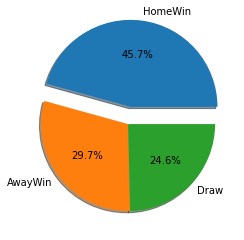

In [17]:
# full time winner summary
Full_time = allmatch['FullTime'].value_counts()
print(Full_time)
plt.pie(Full_time, labels = ['HomeWin', 'AwayWin', 'Draw'], explode = [0.2, 0, 0], shadow = True, autopct='%.1f%%')
plt.show()

In general, It looks like teams do benefit from the “familiarity” of playing matches at their own ground and crowds are a bigger factor

No      2646
Draw     936
Yes      218
Name: Relegated_FullTime, dtype: int64


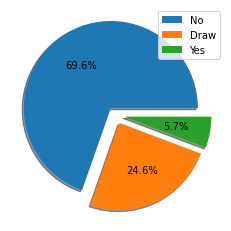

In [18]:
# summarize full time winner based on if the team is relegated, not relegated or draw
R_Full_time = allmatch['Relegated_FullTime'].value_counts()
print(R_Full_time)
plt.pie(R_Full_time, explode = [0.1, 0.1, 0.1], shadow = True, autopct='%.1f%%')
plt.legend(labels = ['No', 'Draw', 'Yes'])
plt.show()

##   Most Relegated Clubs During Last Decade:

Norwich    3
Fulham     2
Hull       2
QPR        2
Cardiff    2
Name: Club, dtype: int64


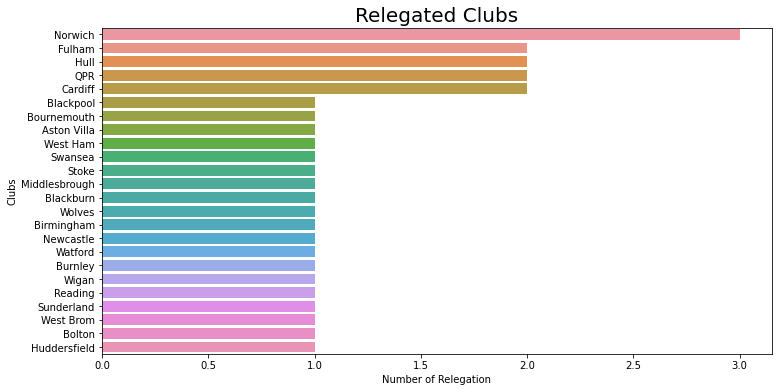

In [19]:
# leaguetable.Relegated.describe()
# YesRelegated return the frequency of relegted group by top 5 club team 
YesRelegated = leaguetable.loc[leaguetable['Relegated'] == 'Yes']
R_club = YesRelegated['Club'].value_counts()
print(R_club.head())

plt.figure(figsize = (12,6))
R_freq = YesRelegated.Club.value_counts()
sns.barplot(y = R_freq.index, x = R_freq)
plt.xlabel("Number of Relegation")
plt.ylabel("Clubs")
plt.title("Relegated Clubs", fontsize = 20)
plt.show()

Norwich is the only team to get relegated from the premier league 3 times

## List of Relegated Clubs Per Year:

In [20]:
# show the 3 relegated teams in a decade
# I will put YesRelegated variable in each used cell in case the examiner run the cell seperatly
YesRelegated = leaguetable.loc[leaguetable['Relegated'] == 'Yes']
print(YesRelegated.groupby(['Year'])['Club'].value_counts())

Year     Club         
2010/11  Birmingham       1
         Blackpool        1
         West Ham         1
2011/12  Blackburn        1
         Bolton           1
         Wolves           1
2012/13  QPR              1
         Reading          1
         Wigan            1
2013/14  Cardiff          1
         Fulham           1
         Norwich          1
2014/15  Burnley          1
         Hull             1
         QPR              1
2015/16  Aston Villa      1
         Newcastle        1
         Norwich          1
2016/17  Hull             1
         Middlesbrough    1
         Sunderland       1
2017/18  Stoke            1
         Swansea          1
         West Brom        1
2018/19  Cardiff          1
         Fulham           1
         Huddersfield     1
2019/20  Bournemouth      1
         Norwich          1
         Watford          1
Name: Club, dtype: int64


# Performance of Relegated Clubs by Year:
## Average Number of Points Scored:

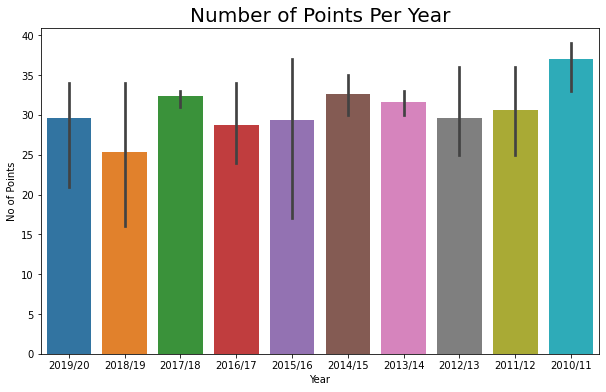

In [21]:
#average number of goals conceded 
YesRelegated = leaguetable.loc[leaguetable['Relegated'] == 'Yes']
# min points and the average yearly
# display(np.round(YesRelegated.groupby(['Year'], sort = True)['Points'].agg(["mean", "min"]),2))

# plot using barplot 
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'Year', y = 'Points', data = YesRelegated)
plt.xlabel("Year")
plt.ylabel("No of Points")
plt.title("Number of Points Per Year", fontsize = 20)
plt.show()

# plot using line graph
# YesRelegated.groupby(['Year'], sort=False)['Points'].agg("mean").plot()

# Match Result Trends (Wins vs Losses)

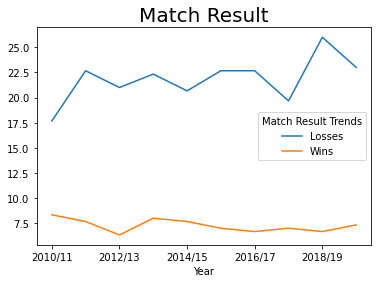

In [22]:
#display(np.round(pd.pivot_table(YesRelegated, index = ['Year'], values = ['Losses', 'Wins'], aggfunc = np.mean),2))

YesRelegated = leaguetable.loc[leaguetable['Relegated'] == 'Yes']
# plot average of losses and wins in a single season
pd.pivot_table(YesRelegated, index = ['Year'], values = ['Losses', 'Wins'], aggfunc = np.mean).plot()
plt.legend(title = 'Match Result Trends')
plt.title('Match Result', fontsize = 20)
plt.show()

# Goals Scored vs Conceded Trends:

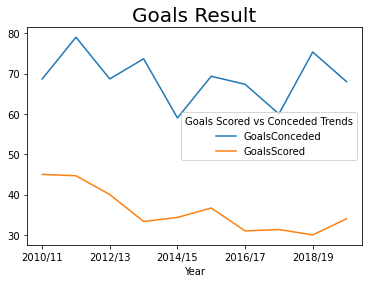

In [23]:
#display(np.round(pd.pivot_table(YesRelegated, index = ['Year'], values = ['GoalsScored', 'GoalsConceded'], aggfunc = np.mean),2))

YesRelegated = leaguetable.loc[leaguetable['Relegated'] == 'Yes']
# calculate average of goals scored and goals conceded in a single season
pd.pivot_table(YesRelegated, index = ['Year'], values = ['GoalsScored', 'GoalsConceded'], aggfunc = np.mean).plot()
plt.legend(title = 'Goals Scored vs Conceded Trends')
plt.title('Goals Result', fontsize = 20)
plt.show()


#### From the above charts we can see that

- Average number of points scored by relegated clubs have reduced slightly over time
- within last years, 2010/2011 has the highest number of points obtained
- Across the different metrics, they have struggled both defensively and offensively
- Number of wins reduced while number of losses increased over the years
- Moreover, number of goals scored (in a single season) by relegated teams looks to have significantly reduced from 45 to 35



## Relegated Teams Winner Compared to Not Relegated Teams:

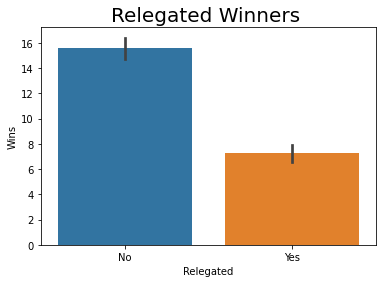

In [24]:
np.round(leaguetable.groupby(['Relegated'], sort=False)['Wins'].mean(), 2)

ax = sns.barplot(x = leaguetable.Relegated, y = leaguetable.Wins)
ax.set_title("Relegated Winners ", fontsize = 20)
plt.show()

It's clear that relegated teams win only half the number of matches as much as teams that end up staying in PL

### Future work : 
It's worth analyzing performance of Norwich FC, since they have been relegated the most in last 10 years. Also they currently are top of EFL Championship table which means they could be back in the Premier League yet again next season.

In [25]:
# slicing Norwich only from leaguetable
Norwich = leaguetable.loc[leaguetable['Club'] == 'Norwich']
Norwich
# allmatch.loc[allmatch['AwayTeam'] == 'Norwich']

,Position,Club,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,Points,Year,Relegated
19,20,Norwich,38,5,6,27,26,75,-49,21,2019/20,Yes
18,19,Norwich,38,9,7,22,39,67,-28,34,2015/16,Yes
17,18,Norwich,38,8,9,21,28,62,-34,33,2013/14,Yes
10,11,Norwich,38,10,14,14,41,58,-17,44,2012/13,No
11,12,Norwich,38,12,11,15,52,66,-14,47,2011/12,No


# Hypotheses Testing : Why Teams Get Relegated ?


## 1. Bad Offensive Performance Based on Goals Scored:

,GoalsScored,Wins
Relegated,,
No,55.01,15.56
Yes,36.03,7.27


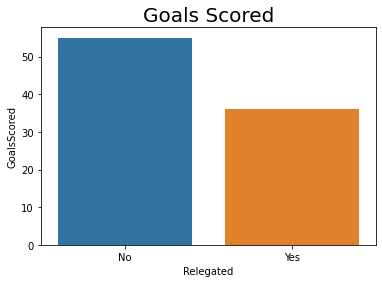

Text(0.5, 1.0, 'Wins')

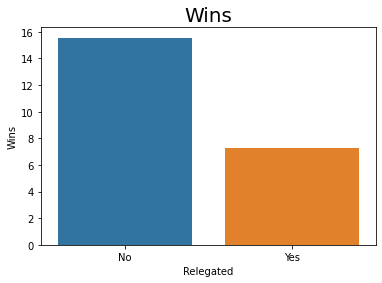

In [26]:
# compare wins and goalss sored if the team relegated or not
offensive = np.round(pd.pivot_table(leaguetable, index = ['Relegated'], values = ['Wins', 'GoalsScored'], aggfunc = np.mean), 2)
display(offensive)

sns.barplot(x = offensive.index, y = offensive.GoalsScored)
plt.title("Goals Scored", fontsize = 20)
plt.show()
sns.barplot(x = offensive.index, y = offensive.Wins)
plt.title("Wins", fontsize = 20)

It is clear that relegated teams struggled to score goals (36 goals compared 55) which partially explains why there are not winning enough matches

## 2. Bad Defensive Performance Based on Goals Conceded:

,GoalsConceded,Losses
Relegated,,
No,49.21,12.99
Yes,68.90,21.83


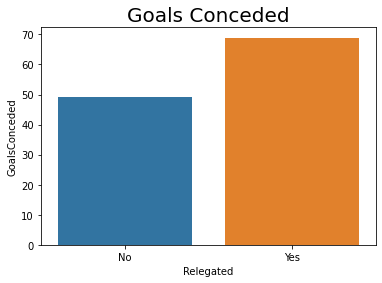

Text(0.5, 1.0, 'Losses')

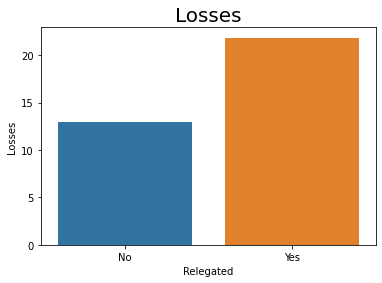

In [27]:
# compare constant teams in the 10 years vs the ones got relegated based on GoalsConceded
defensive = np.round(pd.pivot_table(leaguetable, index = ['Relegated'], values = ['Losses', 'GoalsConceded'], aggfunc = np.mean), 2)
display(defensive)

# using seaborn library to plot the bar chart
sns.barplot(x = defensive.index, y = defensive.GoalsConceded)
plt.title("Goals Conceded", fontsize = 20)
plt.show()
sns.barplot(x = defensive.index, y = defensive.Losses)
plt.title("Losses", fontsize = 20)

Worryingly, the defensive performance is also contributing as they conceded almost 70 goals per season 

## 3. First Half Bad Performance of Relegated Club over The Seasons

Relegated_FullTime,Draw,No,Yes
Relegated_HalfTime,,,
Draw,60.0,37.0,3.0
No,0.0,92.0,8.0
Yes,0.0,93.0,7.0


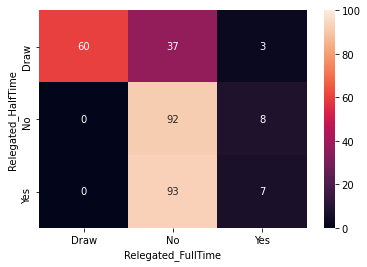

Relegated_HalfTime  Relegated_FullTime
Draw                Draw                   936
                    No                     571
                    Yes                     51
No                  No                    1894
                    Yes                    154
Yes                 No                     181
                    Yes                     13
Name: Relegated_FullTime, dtype: int64

In [28]:
# the percentage is calculated by column, hence Relegated_FullTime is compared to Relegated_HalfTime
ct = pd.crosstab(allmatch.Relegated_HalfTime, allmatch.Relegated_FullTime).apply(lambda x: round (100*x/x.sum()), axis = 1)
display(ct)
sns.heatmap(ct, vmin=0, vmax=100, annot = True)
plt.show()

# # another way is by looking to value counts 
# pd.crosstab(allmatch.Relegated_HalfTime, allmatch.Relegated_FullTime, margins = True)
# # frequency for Relegated_FullTime feature based on Relegated_HalfTime
allmatch.groupby(['Relegated_HalfTime'], sort=False)['Relegated_FullTime'].value_counts()

- Relegated teams usually surrender their lead in the first half (in 181 matches out of 194)
- Also, they found it extremely difficult to recover the match whenever they finish the first half in a losing position (only in 7% of the matches they managed to come back to win the match in second half)

In [29]:
# explain why counts are not insigtful, hence it can be shown as percentages
# I prefer to show this as corss-tabulation (easier to compare the 2 variables)
display(pd.crosstab(allmatch.Relegated_HalfTime, allmatch.Relegated_FullTime))

Relegated_FullTime,Draw,No,Yes
Relegated_HalfTime,,,
Draw,936,571,51
No,0,1894,154
Yes,0,181,13


Text(0.5, 1.0, 'Comparison between Relegated Full-time and Relegated Halft-time')

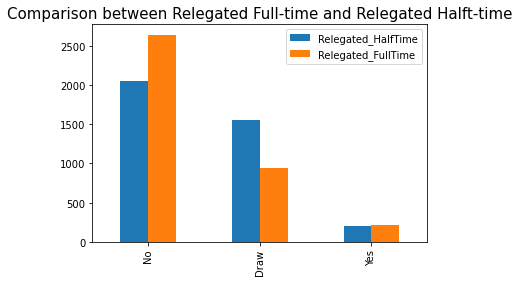

In [30]:
# compare between Relegated Full-time and Relegated Halft-time
Rfulltime_count = allmatch['Relegated_FullTime'].value_counts()
Rhalftime_count = allmatch['Relegated_HalfTime'].value_counts()
match_join = pd.concat([Rhalftime_count, Rfulltime_count] , axis = 1 , join = "inner")
match_join.plot.bar()
plt.title('Comparison between Relegated Full-time and Relegated Halft-time', fontsize = 15)

Relegated teams failed to maintain a draw result at Half time indicating that they perform worse in the second half always

## 4. Effect of Cards on the (Relegated) team's performance:

## Red Cards

Relegated_FullTime,Draw,No,Yes
AwayRedCards,,,
0,863,2436,203
1,73,200,14
2,0,10,1


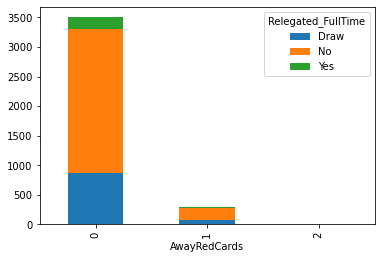

Relegated_FullTime,Draw,No,Yes
AwayRedCards,,,
0,25.0,70.0,6.0
1,25.0,70.0,5.0
2,0.0,91.0,9.0


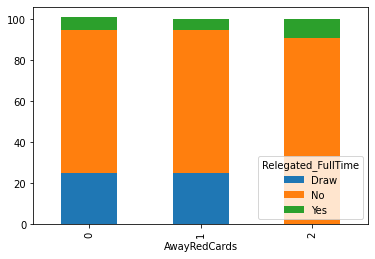

In [31]:
#print(pd.crosstab(allmatch.Relegated_FullTime, allmatch.AwayRedCards, margins = True))
AwayRedCards_ctab_count = pd.crosstab(allmatch.AwayRedCards, allmatch.Relegated_FullTime)
display(AwayRedCards_ctab_count)

# plot number of matches by number of red cards
AwayRedCards_ctab_count.plot.bar(stacked = True)
plt.legend(title = 'Relegated_FullTime')
plt.show()

# calculated as a percentage for easier compareson
AwayRedCards_ctab_pct = pd.crosstab(allmatch.AwayRedCards, allmatch.Relegated_FullTime).apply(lambda x: round (100*x/x.sum()), axis = 1)
display(AwayRedCards_ctab_pct)

# plotted as 100% stacked part to normalize the values 
AwayRedCards_ctab_pct.plot.bar(stacked = True)
plt.legend(title = 'Relegated_FullTime')
plt.show()


Getting one player sent off doesn't seem to impact the result much

## Yellow Cards

Relegated_FullTime,Draw,No,Yes
AwayYellowCards,,,
0,141,464,36
1,252,777,67
2,260,748,59
3,169,429,38
4,89,172,13
5,16,47,5
6,5,7,0
7,3,1,0
8,0,1,0


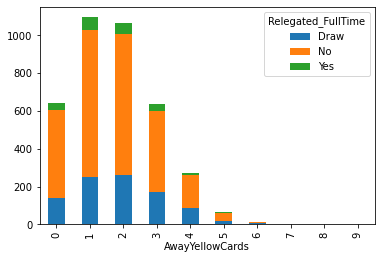

Relegated_FullTime,Draw,No,Yes
AwayYellowCards,,,
0,22.0,72.0,6.0
1,23.0,71.0,6.0
2,24.0,70.0,6.0
3,27.0,67.0,6.0
4,32.0,63.0,5.0
5,24.0,69.0,7.0
6,42.0,58.0,0.0
7,75.0,25.0,0.0
8,0.0,100.0,0.0


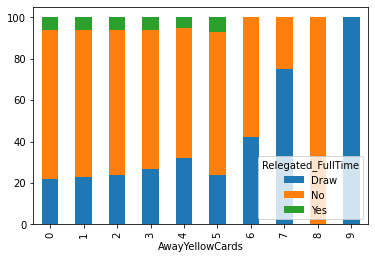

In [32]:
AwayYellowCards_ctab_count = pd.crosstab(allmatch.AwayYellowCards, allmatch.Relegated_FullTime)
display(AwayYellowCards_ctab_count)

# plot number of matches by number of yellow cards
AwayYellowCards_ctab_count.plot.bar(stacked = True)
plt.legend(title = 'Relegated_FullTime')
plt.show()

# calculated as a percentage for easier compareson
AwayYellowCards_ctab_pct = pd.crosstab(allmatch.AwayYellowCards, allmatch.Relegated_FullTime).apply(lambda x: round (100*x/x.sum()), axis = 1)
display(AwayYellowCards_ctab_pct)

# plotted as 100% stacked part to normalize the values 
AwayYellowCards_ctab_pct.plot.bar(stacked = True)
plt.legend(title = 'Relegated_FullTime')
plt.show()


Relegated_FullTime,Draw,No,Yes
HomeYellowCards,,,
0,20.0,75.0,5.0
1,25.0,69.0,6.0
2,25.0,69.0,6.0
3,28.0,66.0,6.0
4,32.0,63.0,5.0
5,28.0,72.0,0.0
6,10.0,80.0,10.0
7,50.0,50.0,0.0


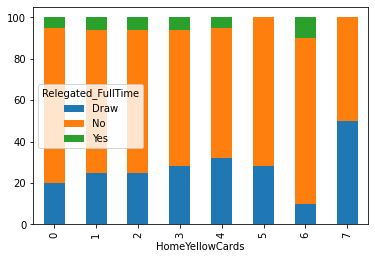

In [33]:
# calculated as a percentage for easier compareson
HomeYellowCards_ctab_pct = pd.crosstab(allmatch.HomeYellowCards, allmatch.Relegated_FullTime).apply(lambda x: round (100*x/x.sum()), axis = 1)
display(HomeYellowCards_ctab_pct)

# plotted as 100% stacked part to normalize the values 
HomeYellowCards_ctab_pct.plot.bar(stacked = True)
plt.legend(title = 'Relegated_FullTime')
plt.show()

- However, high number of players seem to be getting yellow cards as team are chasing for a draw.
- Hints: I am not showing the home matches as it almost has the same result.

## 5. Impact of Home or Away on Relegated Clubs:

In [34]:
print(allmatch.groupby(['Relegated_FullTime'], sort=False)['FullTime'].value_counts(), '\n')

Relegated_FullTime  FullTime
Draw                Draw         936
No                  HomeWin     1594
                    AwayWin     1052
Yes                 HomeWin      143
                    AwayWin       75
Name: FullTime, dtype: int64 



Relegated teams when playing in their own stadiums are more likely to win, 143 wins at home compared to only 75 away

## 6. Referee Impact on Relegated Clubs:

M Atkinson    23
A Marriner    19
M Dean        16
A Taylor      14
M Oliver      13
Name: Referee, dtype: int64


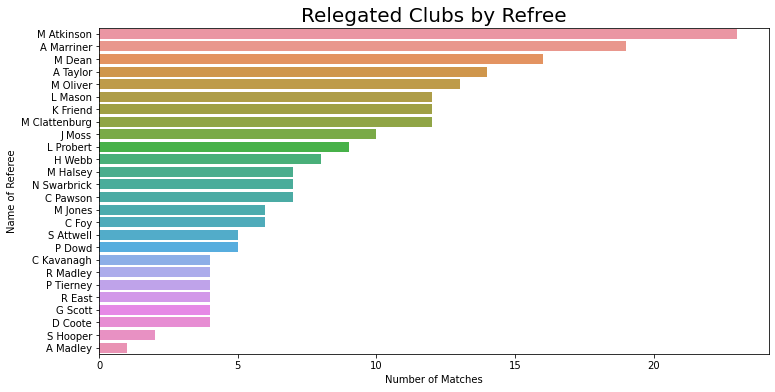

In [35]:
# general idea about referees
# top 5 referees for relegated clubs
YesRelegated_allmatch = allmatch.loc[allmatch['Relegated_FullTime'] == 'Yes']
print(YesRelegated_allmatch['Referee'].value_counts().head())

# relegated clubs referee
plt.figure(figsize = (12,6))
count = YesRelegated_allmatch.Referee.value_counts()
sns.barplot(y = count.index, x = count)
plt.xlabel("Number of Matches")
plt.ylabel("Name of Referee")
plt.title("Relegated Clubs by Refree", fontsize = 20)
plt.show()

[Text(-5.0, 0, 'S Attwell'),
 Text(0.0, 0, 'A Madley'),
 Text(5.0, 0, 'C Pawson'),
 Text(10.0, 0, 'J Moss'),
 Text(15.0, 0, 'M Atkinson'),
 Text(20.0, 0, 'M Oliver'),
 Text(25.0, 0, 'P Tierney'),
 Text(30.0, 0, 'S Attwell'),
 Text(35.0, 0, ''),
 Text(40.0, 0, '')]

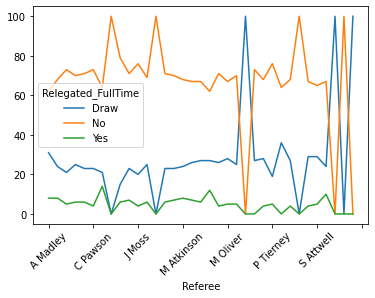

In [36]:
# cross-tabulation between refrees and match results, calculated as a percentage for easier comparison
# display(pd.crosstab(allmatch.Referee, allmatch.Relegated_FullTime).apply(lambda x: round (100*x/x.sum()), axis = 1))
# display(pd.pivot_table(allmatch, index = ['Referee'], values = ['Relegated_FullTime'], aggfunc = np.count_nonzero))

# win ratio per referee
ratio = pd.crosstab(allmatch.Referee, allmatch.Relegated_FullTime).apply(lambda x: round (100*x/x.sum()), axis = 1).plot()
ratio.set_xticklabels(ratio.get_xticklabels(), rotation = 45)

Match results seem to be impacted by the choice of some referees, given the fact that loss % is very high

## Literature Review:
There are not a lot of similar studies, maybe due to the fact that football in data science is new, however, I looked at studies which study English Premier League. 

* One of the projects uses historical Engligh Premier League (EPL) tables to understand how many points a team will need to earn, to avoid relegation. By using a logistic regression model, its possible to estimate the probability of relegation associated with a given points total. The result suggest that the old manager maxim "forty points clear", doesn't gurantee safety from relegation(1)

* Another report focuses mainly on general trend of goals, the role which grounds play in them and how they effect  match results, it concluded that:
    - Teams score a higher number of goals on their home grounds than on away grounds
    - The top 6 teams Arsenal, Chelsea, Man City, Man United, Liverpool and Spurs dominate the table in terms of both home and away goals scored
    - Match result trends for a team on their home ground show a 45.7%, 28.5% and 25.8% chance of a win, a loss and a draw respectivly
    - The trend of total goals scored in a season shows a huge difference between goals scored on home and away ground, implying that visiting teams have often found it harder to score more goals(2)

* Another study concludes that only 24% of clubs that were relegated immediately regained promotion. Indicating that It is indeed quite a challenge to regain promotion(3)

* The report of previous study discusses the case of Bournemouth club and how they have struggled in 19/20 season in which they eventuatlly got relegated back to the Championship. They have struggled both defensively and offensively and have clearly again relied heavily on Callum Wilson to score goals. Also based on the way they have performed so far in that season, a drastic change in style may be required(4)

## Conclusions:
By applying some of the techniques that taught in the topics, and more. I tried to explore the reasons behind relegation and achieved this by identify the key patterns in relegated teams, as follows
- In general, average number of points scored by relegated clubs have reduced slightly over time and number of wins reduced while number of losses increased over the years
- A common pattern in the relegated teams is that they have struggled both defensively and offensively
    - Based on number of goals scored (in a single season) by relegated teams looks to have significantly reduced, which partially explains why they are not winning enough matches

    - Moreover, defensive performance is also contributing to the relegation 
- Even when relegated teams finish the first half in a winning position, usually they surrender their lead in the second half
Also, they found it extremely difficult to recover the match whenever they finish the first half in a losing position
- On the other hand, getting a player sent off doesn't seem to impact the match result much
- Relegated teams when playing in their own stadiums are more likely to win
- Match results seem to be impacted by the choice of some referees

## Limitations:
* Difficulty in analyazing matches ending in a draw, hence the focus was only on wins and losses
* It is not feasible to get the city for each team, to see the geographic impacts on relegated

## Future Work:
* Do more analysis on Norwich to know the reason behind why he is the most team got relegated in the last decade
* Get the city for each team, to see the geographic impacts on relegated
* Average age for relegated teams compared to others
* Include average team value price and budget as a factor

## References:
1. Gonzalez, A. (2017), Forty Points Clear?, <a href= https://github.com/aaguilargonzalez/forty-points-clear > available from here </a>
2. schrodingers. (2020), Analyzing English Premier League, <a href= https://github.com/schrodingers-coder/EPL-Analysis/blob/master/Investigate_a_Dataset.ipynb> available from here </a>
3. Nath, V. (2016), Exploratory Data Analysis of the Historical English Premier League Table, <a href= https://rstudio-pubs-static.s3.amazonaws.com/172301_c79557c8402b4f8f8fb26c2cb86539bf.html> available from here </a>
4. Gurney,S.(2020), Will Bournemouth avoid relegation from the Premier League? – data analysis, <a href= https://eplanalysis.com/bournemouth-201920-data-analysis-statistics> available from here </a>
5. Nguyen, T, (2020), English Premier League Data, <a href= https://github.com/tara-nguyen/english-premier-league-datasets-for-10-seasons/ > datasets were doanloaded from here </a>
6. <a href= https://www.sportinglife.com/football/news/inside-the-pl-relegation-battle/180280> Image used on the top was uploaded from here </a>

In [37]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [39]:
# pip freeze